# GDP Analysis of Indian States

In this project, all indian states are analyzed in the context of ***industry and education***. The **goal** in this project is to analyze economic development of the states in the context of Industry and Education. <br>
As the most common measure of economic development is the GDP, states' GDP is analyzed and insights observed are mentioned. Recommendations to improve the GDP per capita are also given.

Libraries used in this project are **Numpy, Pandas, Matplotlib, and Seaborn**.

## List of Contents

**1. Introduction** <br>
1.1 - Understanding GDP <br>
1.2 - Data <br>
*1.2a - Importing Modules <br>
1.2b - Pulling csv data into Dataframes* <br>

**2. Part - 1** <br>
2.1 - Data Cleaning <br>
2.2 - Average growth of states during 2013-14 to 2015-16 <br>
2.3 - Total GDP of states for the year 2015-16 <br>

**3. Part - 2** <br>
3.1 - Data Cleaning <br>
*3.1a - Merging all the state data together. <br>
3.1b - Cleaning the merged dataset.* <br>
3.2 - GDP per capita of states <br>
3.3 - Contribution of sectors as a percentage of GDP (Total, State-wise) <br>
3.4 - Categorization of states based on GDP per capita into quantiles <br>
3.5 - Top subsectors for each quantile categorization <br>
3.6 - Insights and Recommendations for the quantile categorizations <br>

**4. Part - 3** <br>
4.1 - Data Cleaning <br>
4.2 - Corelation of GDP per capita vs. dropout rates in education <br>
4.3 - Insights and Recommendations <br>

## 1. Introduction

### 1.1 - Understanding GDP

**Gross Domestic Product (GDP)** at current prices is the GDP at the market value of goods and services produced in a country during a year. The **GDP** measures the 'monetary value of final goods and services produced by a country/state in a given period of time often anually. <br>

Broadly speaking, we can divide GDP into goods and services produced by three sectors: the `primary sector` **(agriculture)**, the `secondary sector` **(industry)**, and the `tertiary sector` **(services)**. <br>

As prices throughout a year can change due to inflation, another measured is created to account for this change. **Real GDP** is **Nominal GDP** (GDP evaluated at the *market prices* of some base year) accounted for **inflation or deflation**. In this project, `Nominal GDP` is going to be utilized. The `2015-16` financial year will be considered as the base year for the nominal GDP.

### 1.2 -  Data

The data is sourced from https://data.gov.in/ which is an Open Government Data (OGD) platform of India. <br>

The first dataset contains data on **state-wise Gross Domestic Product (GDP)** at current price on a yearly basis. <br>

The second dataset contains data on **Gross State Value Added (GSVA)** and **Gross State Domestic Product (GSDP)** along with GDP breakdown for various sectors and subsectors. There's a *separate dataset for each state*. There were a total of 28 states but we only possess data for **27 states**.

The third dataset contains data on the annual drop out rates at various stages of education (primary, secondary, etc.).

#### 1.2a - Importing Modules

In [977]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2b -  Pulling csv data into DataFrames

In [978]:
#state_gdp is State-wise Gross Domestic Product (GDP) at current price on yearly basis
gsdp = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\GSDP_CurrentPrice_YearlyBasis.csv')

#gsva_*state* is Gross State Value Added (GSVA) by economic activity at current prices for a certain state
gsva_and = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
gsva_aru = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
gsva_ass = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Assam-GSVA_cur_2015-16.csv')
gsva_bih = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Bihar-GSVA_cur_2015-16.csv')
gsva_cha = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
gsva_goa = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Goa-GSVA_cur_2015-16.csv')
gsva_guj = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Gujarat-GSVA_cur_2015-16.csv')
gsva_har = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Haryana-GSVA_cur_2016-17.csv')
gsva_him = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
gsva_jha = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Jharkhand-GSVA_cur_2015-16.csv')
gsva_kar = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Karnataka-GSVA_cur_2015-16.csv')
gsva_ker = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Kerala-GSVA_cur_2015-16.csv')
gsva_mad = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
gsva_mah = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Maharashtra-GSVA_cur_2014-15.csv')
gsva_man = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Manipur-GSVA_cur_2014-15.csv')
gsva_meg = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Meghalaya-GSVA_cur_2016-17.csv')
gsva_miz = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Mizoram-GSVA_cur_2014-15.csv')
gsva_nag = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Nagaland-GSVA_cur_2014-15.csv')
gsva_odi = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Odisha-GSVA_cur_2016-17.csv')
gsva_pun = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Punjab-GSVA_cur_2014-15.csv')
gsva_raj = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Rajasthan-GSVA_cur_2014-15.csv')
gsva_sik = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Sikkim-GSVA_cur_2015-16.csv')
gsva_tam = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
gsva_tel = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Telangana-GSVA_cur_2016-17.csv')
gsva_tri = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Tripura-GSVA_cur_2014-15.csv')
gsva_utp = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
gsva_utk = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\States\NAD-Uttarakhand-GSVA_cur_2015-16.csv')

#drop_rate is state wise average annual drop out rates
drop_rate = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 2 - Statistics & EDA\Module 9 - GDP Analysis Assignment\DropOut_Rates.csv')

## 2. Part - 1

We only utilize the first dataset in this part. This part consists of: <br>
2.1 - Data Cleaning <br>
2.2 - Average growth of states during 2013-14 to 2015-16 <br>
2.3 - Total GDP of states for the year 2015-16 <br>

In [979]:
gsdp

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


### 2.1 - Data Cleaning

-  Rows where the year was 2016-17 was removed as we don't have complete data. 
-  Null values were found by column and row. Missing values in 2015-16 row years.
-  The *WestBengal1 column* was dropped as it's filled with only null values. 
-  We update every null value in the GSDP - CURRENT PRICES rows with the mean of the respective column (where item description = GSDP - CURRENT PRICES) for the 2015-16 year
-  We update every null value for the % growth rows with the % growth from the previous year (where item description = % growth) for the 2015-16 year

In [980]:
# removes the rows where item description (% Growth over previous year) and GSDP - CURRENT PRICES (` in Crore) for the year of 2016-17
gsdp = gsdp[~(((gsdp['Items  Description'] == '(% Growth over previous year)') | (gsdp['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)')) & (gsdp.Duration == '2016-17'))]

gsdp.isnull().sum() #null values by column
gsdp.isnull().sum(axis = 1) # null values by row
gsdp = gsdp.drop(columns = 'West Bengal1' ,axis=1) # dropping the west bengal column as all NaNs

gsdp_top = gsdp.iloc[:5,:] # taking the top half of dataframe with only GSDP - CURRENT PRICES (` in Crore) row values to modify

# updates every null value in the gsdp row with the mean of the respective column for the year 2015-16
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Himachal Pradesh']), 'Himachal Pradesh'] = gsdp_top.loc[:,'Himachal Pradesh'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Maharashtra']), 'Maharashtra'] = gsdp_top.loc[:,'Maharashtra'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Manipur']), 'Manipur'] = gsdp_top.loc[:,'Manipur'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Mizoram']), 'Mizoram'] = gsdp_top.loc[:,'Mizoram'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Nagaland']), 'Nagaland'] = gsdp_top.loc[:,'Nagaland'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Punjab']), 'Punjab'] = gsdp_top.loc[:,'Punjab'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Rajasthan']), 'Rajasthan'] = gsdp_top.loc[:,'Rajasthan'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Tripura']), 'Tripura'] = gsdp_top.loc[:,'Tripura'].mean()
gsdp_top.loc[np.isnan(gsdp_top.loc[:,'Andaman & Nicobar Islands']), 'Andaman & Nicobar Islands'] = gsdp_top.loc[:,'Andaman & Nicobar Islands'].mean()
# the above changes are also reflected in the originial gsdp dataframe

# updates every null value for the % growth row for the year 2015-16 
gsdp.loc[np.isnan(gsdp.loc[:,'Himachal Pradesh']), 'Himachal Pradesh'] = abs(100*(gsdp.loc[4,'Himachal Pradesh'] - gsdp.loc[3,'Himachal Pradesh']) / gsdp.loc[3,'Himachal Pradesh'])
gsdp.loc[np.isnan(gsdp.loc[:,'Maharashtra']), 'Maharashtra'] = abs(100*(gsdp.loc[4,'Maharashtra'] - gsdp.loc[3,'Maharashtra']) / gsdp.loc[3,'Maharashtra'])
gsdp.loc[np.isnan(gsdp.loc[:,'Manipur']), 'Manipur'] = abs(100*(gsdp.loc[4,'Manipur'] - gsdp.loc[3,'Manipur']) / gsdp.loc[3,'Manipur'])
gsdp.loc[np.isnan(gsdp.loc[:,'Mizoram']), 'Mizoram'] = abs(100*(gsdp.loc[4,'Mizoram'] - gsdp.loc[3,'Mizoram']) / gsdp.loc[3,'Mizoram'])
gsdp.loc[np.isnan(gsdp.loc[:,'Nagaland']), 'Nagaland'] = abs(100*(gsdp.loc[4,'Nagaland'] - gsdp.loc[3,'Nagaland']) / gsdp.loc[3,'Nagaland'])
gsdp.loc[np.isnan(gsdp.loc[:,'Punjab']), 'Punjab'] = abs(100*(gsdp.loc[4,'Punjab'] - gsdp.loc[3,'Punjab']) / gsdp.loc[3,'Punjab'])
gsdp.loc[np.isnan(gsdp.loc[:,'Rajasthan']), 'Rajasthan'] = abs(100*(gsdp.loc[4,'Rajasthan'] - gsdp.loc[3,'Rajasthan']) / gsdp.loc[3,'Rajasthan'])
gsdp.loc[np.isnan(gsdp.loc[:,'Tripura']), 'Tripura'] = abs(100*(gsdp.loc[4,'Tripura'] - gsdp.loc[3,'Tripura']) / gsdp.loc[3,'Tripura'])
gsdp.loc[np.isnan(gsdp.loc[:,'Andaman & Nicobar Islands']), 'Andaman & Nicobar Islands'] = abs(100*(gsdp.loc[4,'Andaman & Nicobar Islands'] - gsdp.loc[3,'Andaman & Nicobar Islands']) / gsdp.loc[3,'Andaman & Nicobar Islands'])

### 2.2 - Average growth of states during 2013-14 to 2015-16

-  Calculated the average growth of states (and union territories) over the duration 2013-14, 2014-15, and 2015-16 by taking the mean of the row in the cleaned gsdp table.
-  Plotted the average growth for every state and union territory
.
-  Average growth of my home state vs. the national average.

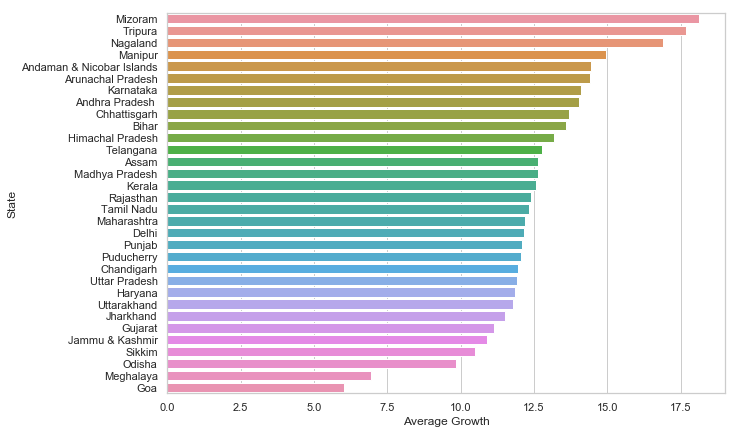

In [981]:
avg_growth_state = pd.DataFrame(gsdp.iloc[6:,:34].mean(axis=0),columns = ['Average Growth'])#calculates average growth of states over the duration 2013-14 to 2015-16
avg_growth_state['State'] = avg_growth_state.index # adding states as a column
avg_growth_state = avg_growth_state.reset_index(drop = True) # resetting the index of the dataframe as a range of numbers
avg_growth_state.sort_values('Average Growth', ascending = False, inplace= True)

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.barplot(y='State', x= 'Average Growth', data=avg_growth_state)
plt.show()

As you can see from the plot above, the fastest growing states are **Mizoram, Tripura, Nagaland** while the slowest growing states are **Goa, Meghalaya, Odisha**.

In [982]:
and_growth = avg_growth_state.loc[avg_growth_state['State'] == 'Andhra Pradesh ']
print(and_growth)
print('India GDP is {}'.format(gsdp.iloc[6:, -1].mean(axis=0)))

   Average Growth            State
0       14.033333  Andhra Pradesh 
India GDP is 11.203333333333333


The average growth of my home state is **14.03%**. It is growing faster than the country's average which is at **11.20 %**.

### 2.3 - Total GDP of states for the year 2015-16 

-  Plotted the total GDP of every state (and union territories) in the year 2015-16
-  Identified top and bottom 5 states in terms of total GDP

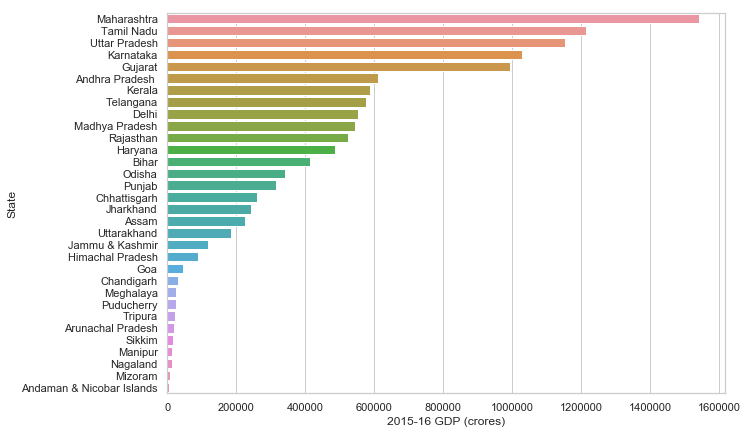

In [983]:
# making a dataframe with the 2015-16 GDP for each state
state_gdp = pd.DataFrame(gsdp.loc[(gsdp['Duration'] == '2015-16') & (gsdp['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)'), :])
state_gdp = state_gdp.T # transpose to flip the dataframe
state_gdp = state_gdp.drop(['Items  Description', 'Duration','All_India GDP']) # dropping unecessary rows
state_gdp['State'] = state_gdp.index # adding a column state from the index
state_gdp = state_gdp.rename(columns = {4:'2015-16 GDP (crores)'}) # renaming the column
state_gdp = state_gdp.reset_index(drop = True) # reseting the index of the dataframe to range of numbers
state_gdp = state_gdp.sort_values('2015-16 GDP (crores)', ascending = False)

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.barplot(y='State', x= '2015-16 GDP (crores)', data=state_gdp)
plt.show()

From the plot above, we can clearly tell the top 5 and bottom 5 state based on 2015-16 GDP are: <br> Top 5 States: **Maharastra, Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat**. <br> Bottom 5 states: **Andaman & Nicobar Islands, Mizoram, Nagaland, Manipur, Sikkim**.

## 3. Part - 2

We utilize the second dataset in this part consisting of datasets from 27 states. This part consists of: <br>
3.1 - Data Cleaning <br>
3.2 - GDP per capita of states <br>
3.3 - Contribution of sectors as a percentage of GDP (Total, State-wise) <br>
3.4 - Categorization of states based on GDP per capita into quantiles <br>
3.5 -Top subsectors for each quantile categorization <br>
3.6 - Recommendations for each quantile categorization

In [984]:
gsva_and

,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,1,"Agriculture, forestry and fishing",9400805,11186428,12895568,14819416,17326726,20386004
1,1.1,Crops,5204052,6123041,7114707,7893514,8644285,9717089
2,1.2,Livestock,2758776,3358438,3643026,4309078,5155487,5979648
3,1.3,Forestry and logging,250314,253029,280493,346160,340550,335487
4,1.4,Fishing and aquaculture,1187663,1451920,1857342,2270664,3186404,4353780
5,2,Mining and quarrying,1416194,1459027,1419200,1484300,1633100,1757565
6,Total,Primary,10816999,12645455,14314768,16303716,18959826,22143569
7,3,Manufacturing,5070622,4237657,4242337,4672266,5078685,5740816
8,4,"Electricity, gas, water supply & other utility...",1076517,713029,1014130,1151729,1251910,1298947
9,5,Construction,3702645,3759004,4065131,4664889,4986189,5467732


### 3.1 - Data Cleaning

For this part, as different states have different availability of information, it would be best to compare the latest information that every state contains. Every state has information about the `2014-15` year so analysis will be done on this year. <br>
As we have 27 datasets, it would be easier merge all of the relevant information from every state into one master dataframe. That is done in this section. This section consists of:

-  Merging all the state data together.  
-  Cleaning the merged dataset.

#### 3.1a. Merging all the state data together

-  First 2 columns from any dataframe are extracted as the 2 columns are the common descriptive columns for every dataset.
-  We are only using the `2014-15` year so we drop the unnecessary columns from every state dataset. Some datasets contain information only upto 2014-15 while others contain more years.
-  Renaming the column name for every dataset by the appropiate name of the state. 
-  Merging all the columns into one single dataframe.

In [985]:
# This dataframe is the label part of every dataset which will be used when appending
standard = gsva_and.iloc[:, 0:2]

#This function drops unnecessary columns from every dataset
def Drop_Columns(dataframe):
    extra_col = list(dataframe.columns)
    extra_col.remove('2014-15')
    dataframe.drop(extra_col, axis = 1, inplace = True)

In [986]:
# List of all the states
States = [gsva_and, gsva_aru,gsva_ass,gsva_bih,gsva_cha,gsva_goa,gsva_guj,gsva_har,gsva_him,gsva_jha,gsva_kar,gsva_ker,gsva_mad,gsva_mah,gsva_man,gsva_meg,gsva_miz,gsva_nag,gsva_odi,gsva_pun,gsva_raj,gsva_sik,gsva_tam,gsva_tel,gsva_tri,gsva_utp,gsva_utk]

# Loop to use the retain only the 2014-15 column
for x in States:
    Drop_Columns(x)

In [987]:
#renaming the column with the appropiate state name

gsva_and = gsva_and.rename(columns = {'2014-15' : 'Andhra Pradesh'})
gsva_aru = gsva_aru.rename(columns = {'2014-15' : 'Arunachal Pradesh'})
gsva_ass = gsva_ass.rename(columns = {'2014-15' : 'Assam'})
gsva_bih = gsva_bih.rename(columns = {'2014-15' : 'Bihar'})
gsva_cha = gsva_cha.rename(columns = {'2014-15' : 'Chhatisgarh'})
gsva_goa = gsva_goa.rename(columns = {'2014-15' : 'Goa'})
gsva_guj = gsva_guj.rename(columns = {'2014-15' : 'Gujarat'})
gsva_har = gsva_har.rename(columns = {'2014-15' : 'Haryana'})
gsva_him = gsva_him.rename(columns = {'2014-15' : 'Himachal Pradesh'})
gsva_jha = gsva_jha.rename(columns = {'2014-15' : 'Jharkhand'})
gsva_kar = gsva_kar.rename(columns = {'2014-15' : 'Karnataka'})
gsva_ker = gsva_ker.rename(columns = {'2014-15' : 'Kerala'})
gsva_mad = gsva_mad.rename(columns = {'2014-15' : 'Madhya Pradesh'})
gsva_mah = gsva_mah.rename(columns = {'2014-15' : 'Maharashtra'})
gsva_man = gsva_man.rename(columns = {'2014-15' : 'Manipur'})
gsva_meg = gsva_meg.rename(columns = {'2014-15' : 'Meghalaya'})
gsva_miz = gsva_miz.rename(columns = {'2014-15' : 'Mizoram'})
gsva_nag = gsva_nag.rename(columns = {'2014-15' : 'Nagaland'})
gsva_odi = gsva_odi.rename(columns = {'2014-15' : 'Odisha'})
gsva_pun = gsva_pun.rename(columns = {'2014-15' : 'Punjab'})
gsva_raj = gsva_raj.rename(columns = {'2014-15' : 'Rajasthan'})
gsva_sik = gsva_sik.rename(columns = {'2014-15' : 'Sikkim'})
gsva_tam = gsva_tam.rename(columns = {'2014-15' : 'Tamil Nadu'})
gsva_tel = gsva_tel.rename(columns = {'2014-15' : 'Telangana'})
gsva_tri = gsva_tri.rename(columns = {'2014-15' : 'Tripura'})
gsva_utp = gsva_utp.rename(columns = {'2014-15' : 'Uttar Pradesh'})
gsva_utk = gsva_utk.rename(columns = {'2014-15' : 'Uttrakhand'})

# Redefining list of states to ensure every dataset in the list has the renamed column
States = [gsva_and, gsva_aru,gsva_ass,gsva_bih,gsva_cha,gsva_goa,gsva_guj,gsva_har,gsva_him,gsva_jha,gsva_kar,gsva_ker,gsva_mad,gsva_mah,gsva_man,gsva_meg,gsva_miz,gsva_nag,gsva_odi,gsva_pun,gsva_raj,gsva_sik,gsva_tam,gsva_tel,gsva_tri,gsva_utp,gsva_utk]


In [988]:
# Using a loop to concatenate the 2014-15 GSVA data for the states into a single dataframe
for x in States:
    standard = pd.concat([standard, x], axis=1)

# using a better variable name to define the master dataframe
gsva = standard.copy()

In [989]:
# previewing the master dataframe
gsva.head()

,S.No.,Item,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Goa,Gujarat,Haryana,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttrakhand
0,1,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.0,8015238.0,...,607897,6422978,9285716,15044394,137447,13064238,7591501,799825.0,25097754,1601423.0
1,1.1,Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.0,4636731.0,...,375825,4382636,5690972,7673441,114976,7297820,4162493,397591.0,16215212,866146.0
2,1.2,Livestock,4309078,38387,173478,2060296,352208,30141,2698910.0,2916173.0,...,123800,788243,2638842,5356257,17338,4693361,2951299,88176.0,7096876,391188.0
3,1.3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616.0,352254.0,...,99802,791463,848245,1956660,4529,392705,210741,145096.0,1404936,339293.0
4,1.4,Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.0,110080.0,...,8470,460636,107657,58036,604,680352,266968,168961.0,380730,4796.0


#### 3.1b. Cleaning the merged data

-  Checking the number of null values by rows and columns
-  Replacing the null values by the mean values of the respective row

In [990]:
# Finding the sum of null values by column and row
gsva.isnull().sum()
gsva.isnull().sum(axis=1)

# Replacing the null values by the mean of the respective sector
gsva.loc[5, pd.isnull(gsva.iloc[5,:])] = gsva.iloc[5,2:].mean() 
gsva.loc[13, pd.isnull(gsva.iloc[13,:])] = gsva.iloc[13,2:].mean() 
gsva.loc[16, pd.isnull(gsva.iloc[16,:])] = gsva.iloc[16,2:].mean() 
gsva.loc[17, pd.isnull(gsva.iloc[17,:])] = gsva.iloc[17,2:].mean() 
gsva.loc[18, pd.isnull(gsva.iloc[18,:])] = gsva.iloc[18,2:].mean() 
gsva.loc[19, pd.isnull(gsva.iloc[19,:])] = gsva.iloc[19,2:].mean() 
gsva.loc[20, pd.isnull(gsva.iloc[20,:])] = gsva.iloc[20,2:].mean()

### 3.2 - GDP per capita of states

-  Plotted the GDP per capita for all states.
-  Identified top and bottom 5 states
-  Calculated ratio of the highest to lowest GDP per capita

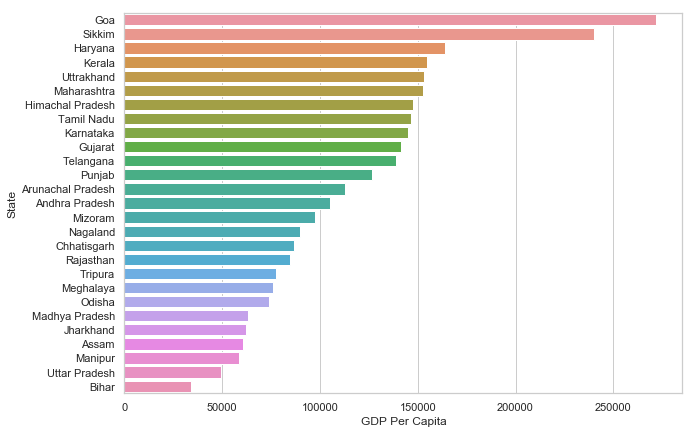

The ratio between the highest per capita GDP and lowest per capita GDP is 8.004741709371503


In [991]:
#making a dataframe with the gdp per capita for all the states
gdp_per_capita = pd.DataFrame(gsva.iloc[32,2:])
gdp_per_capita['State'] = gdp_per_capita.index
gdp_per_capita = gdp_per_capita.rename(columns = {32:'GDP Per Capita'}) # renaming the column
gdp_per_capita = gdp_per_capita.reset_index(drop = True) # reseting the index of the dataframe to range of numbers
gdp_per_capita = gdp_per_capita.sort_values('GDP Per Capita', ascending = False)

#plotting the figure
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.barplot(y='State', x= 'GDP Per Capita', data=gdp_per_capita)
plt.show()

#ratio
ratio = (gdp_per_capita.iloc[0,0]) / (gdp_per_capita.iloc[-1,0])
print("The ratio between the highest per capita GDP and lowest per capita GDP is {}".format(ratio))

From the plot above, the top 5 states are: **Goa, Sikkim, Haryana, Kerala, Uttarakhand**. <br> 
Bottom 5 states are **Bihar, Uttar Pradesh, Manipur, Assam, Jharkhand**.

### 3.3 - Contribution of sectors as a percentage of GDP (Total and State-wise) 

Let's try to get deeper by one level and examine the composition of GDP by goods and services provided by sectors mentioned in the introduction. They are `primary sector` **(agriculture)**, `secondary sector` **(industry)**, and `tertiary sector` **(services)**.  

-  Plotted the percentage contribution of GDP by sectors for the whole country
-  Plotted the percentage contribution of GDP by sectors for all states

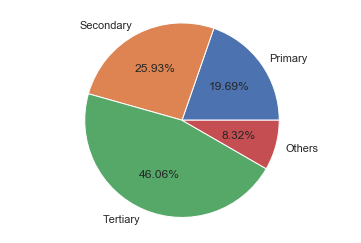

In [992]:
# finding the sum of the three different sectors and others

primary = (gsva.iloc[6, 2:].sum())/(gsva.iloc[30, 2:].sum())*100
secondary = gsva.iloc[10, 2:].sum()/(gsva.iloc[30, 2:].sum())*100
tertiary = gsva.iloc[26, 2:].sum()/(gsva.iloc[30, 2:].sum())*100
others = 100.0 - (primary+secondary+tertiary)

# plotting a pie chart to breakdown the percentage of primary, secondary, tertiary industries as a percentage of total gdp
labels = 'Primary', 'Secondary', 'Tertiary', 'Others'
sizes = [primary, secondary, tertiary, others]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sns.set_context("talk", font_scale = 0.75)
plt.show()

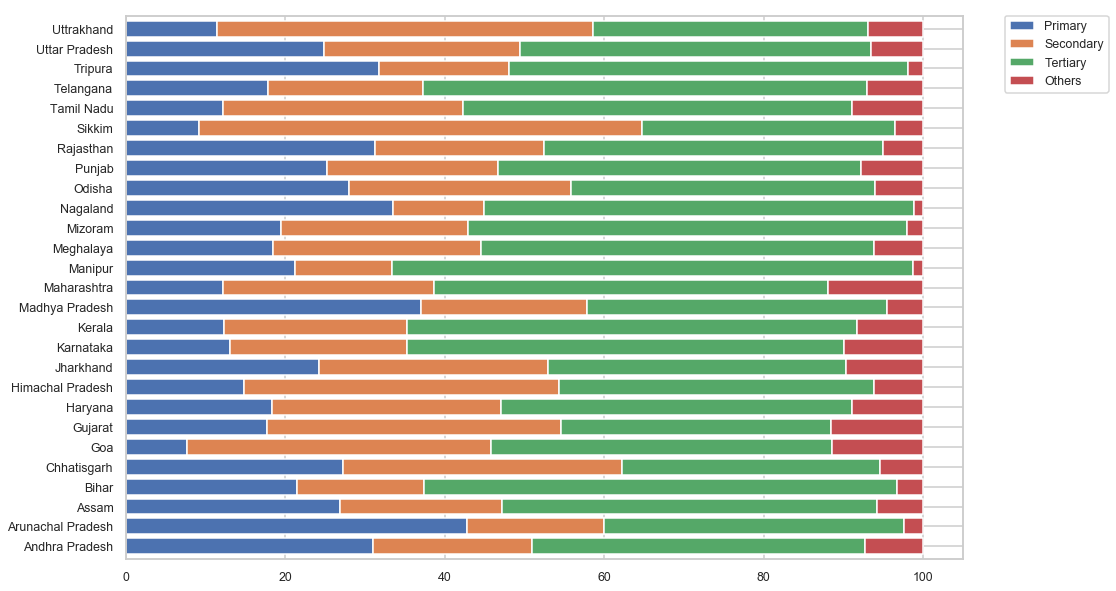

In [993]:
# sectors as a percentage of total gdp for all states

primary2 = gsva.iloc[6, 2:]/(gsva.iloc[30, 2:])*100
secondary2 = gsva.iloc[10, 2:]/(gsva.iloc[30, 2:])*100
tertiary2 = gsva.iloc[26, 2:]/(gsva.iloc[30, 2:])*100
others2 = 100.0 - (primary2+secondary2+tertiary2)

# plotting stacked bar chart
sector_by_state = pd.concat([primary2, secondary2, tertiary2, others2],axis=1)
sector_by_state = sector_by_state.rename(columns = {0:'Primary', 1:"Secondary", 2:'Tertiary', 3:'Others'})

sector_by_state.plot.barh(stacked=True, figsize=(15,10), width = 0.8)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.set_context("talk")
plt.show()

### 3.4 - Categorization of states based on GDP per capita into quantiles

To better understand the top performing states in terms of GDP per capita, each state was categorized based on GDP per capita into one of the 4 categories (C1, C2, C3, C4) where C1 has the states with the highest GDP per capita, followed by C2, C3, and then C4. <br>

Each quantile category has 25% of states. C1 category has the states from 100th percentile to 75th percentile.

In [994]:
# using the pd.qcut function to find the respective quantiles and assign to our dataset based on gdp_per_capita
gdp_per_capita['Quantile'] = pd.qcut(gdp_per_capita.loc[:,'GDP Per Capita'],[0,0.25,0.5,0.75,1], labels = ['C4','C3','C2','C1'])
print(gdp_per_capita)

   GDP Per Capita              State Quantile
5          271793                Goa       C1
21         240274             Sikkim       C1
7          164077            Haryana       C1
11         154778             Kerala       C1
26         153076         Uttrakhand       C1
13         152853        Maharashtra       C1
8          147330   Himachal Pradesh       C1
22         146503         Tamil Nadu       C2
10         145141          Karnataka       C2
6          141263            Gujarat       C2
23         139035          Telangana       C2
19         126606             Punjab       C2
1          112718  Arunachal Pradesh       C2
0          104977     Andhra Pradesh       C3
16          97687            Mizoram       C3
17          89607           Nagaland       C3
4           86860        Chhatisgarh       C3
20          84837          Rajasthan       C3
24          77358            Tripura       C3
15          76228          Meghalaya       C3
18          73979             Odis

### 3.5 - Top subsectors for each quantile categorization

Building off the above section, let's get another level deeper and analyze the top `subsectors` by **revenue** for each category (C1, C2, C3, C4) and from which sector, the top subsectors belong to.

-  Plotted the contribution of the subsectors for each quantile category (C1, C2, C3, C4)

In [995]:
# The sectors describing each subsector
subsect = ['Primary', 'Primary', 'Secondary', 'Secondary', 'Secondary', 'Tertiary', 'Tertiary', 'Tertiary', 'Tertiary', 'Tertiary', 'Tertiary', 'NaN']
subsect = pd.DataFrame(subsect)
subsect = subsect.rename(columns = {0:'Sector'})

#### C1 category (75th to 100th percentile)

The states in the C1 quantile category are:
5                  Goa
21              Sikkim
7              Haryana
11              Kerala
26          Uttrakhand
13         Maharashtra
8     Himachal Pradesh
Name: State, dtype: object


C:\Users\Avinash Bandlapalli\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


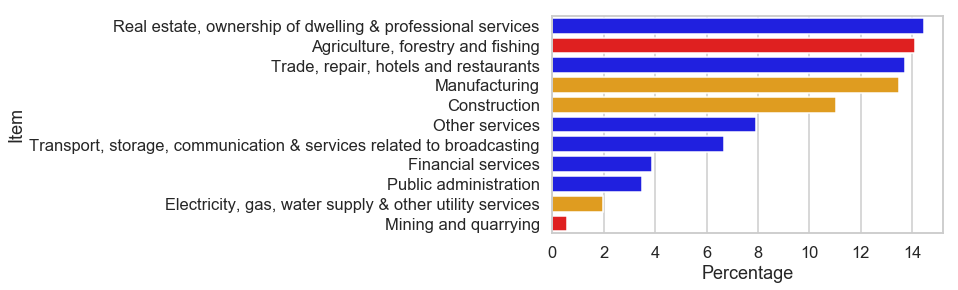

In [996]:
# Grabbing the states in the c1 quantile
C1_states = (gdp_per_capita.loc[gdp_per_capita['Quantile'] == 'C1']).State
print("The states in the C1 quantile category are:")
print(C1_states)

# grabbing the info of the states in c1
C1 = gsva.loc[:,['S.No.', 'Item', 'Goa', 'Sikkim', 'Haryana','Kerala', 'Uttarakhand', 'Maharastra', 'Himachal Pradesh']]
C1_subsectors = C1.iloc[[0,5,7,8,9,11,14,22,23,24,25,30],:]

# adding the sector column to subsector dataframe
C1_subsectors.reset_index(drop=True, inplace = True)
C1_subsectors = pd.concat([C1_subsectors, subsect], axis=1)
C1_total = C1_subsectors.iloc[11,2:-2].sum()

# calculating the percentage of sub-sectors of the total GSDP
C1_percent = 100*((C1_subsectors.iloc[:,2:-2].sum(axis=1))/C1_total)
C1_percent.sort_values(ascending = False, inplace = True)

#graphing the percentage of sub-sectors of the total GSDP
C1_graph = pd.concat([C1_subsectors, C1_percent], axis = 1)
C1_graph = C1_graph.rename(columns = {0:'Percentage'})
C1_graph = C1_graph.iloc[:-1,:]
C1_graph.sort_values('Percentage', ascending = False, inplace = True)

# setting the colors of the columns to represent a sector
subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C1_graph['Sector']]

# plotting the barplot
plt.figure(figsize=(7,4))
sns.barplot(y = 'Item', x = 'Percentage', data=C1_graph, palette=subsect_colors)
sns.set(style="whitegrid")
plt.show()

#### C2 Category (50th to 75th percentile)

The states in the C2 quantile category are:
22           Tamil Nadu
10            Karnataka
6               Gujarat
23            Telangana
19               Punjab
1     Arunachal Pradesh
Name: State, dtype: object


C:\Users\Avinash Bandlapalli\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


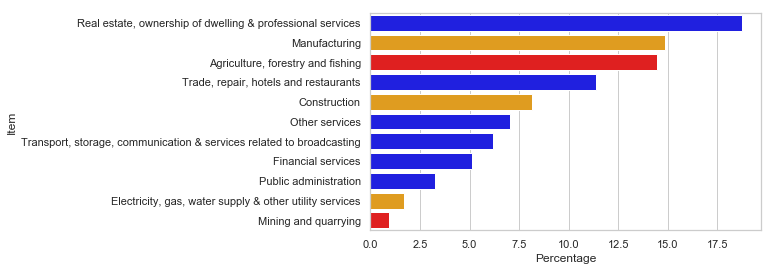

In [997]:
C2_states = (gdp_per_capita.loc[gdp_per_capita['Quantile'] == 'C2']).State
print("The states in the C2 quantile category are:")
print(C2_states)

C2 = gsva.loc[:,['S.No.', 'Item', 'Tamil Nadu', 'Karnataka', 'Gujurat', 'Telangana', 'Punjab', 'Arunachal Pradesh']]
C2_subsectors = C2.iloc[[0,5,7,8,9,11,14,22,23,24,25,30],:]

C2_subsectors.reset_index(drop=True, inplace = True)
C2_subsectors = pd.concat([C2_subsectors, subsect], axis=1)
C2_total = C2_subsectors.iloc[11,2:-2].sum()

C2_percent = 100*((C2_subsectors.iloc[:,2:].sum(axis=1))/C2_total)
C2_percent.sort_values(ascending = False, inplace = True)

C2_graph = pd.concat([C2_subsectors, C2_percent], axis = 1)
C2_graph = C2_graph.rename(columns = {0:'Percentage'})
C2_graph = C2_graph.iloc[:-1,:]
C2_graph.sort_values('Percentage', ascending = False, inplace = True)

subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C2_graph['Sector']]

plt.figure(figsize=(7,4))
sns.barplot(y = 'Item', x = 'Percentage', data=C2_graph, palette=subsect_colors)
sns.set(style="whitegrid")
plt.show()

#### C3 Category (25th to 50th percentile)

The states in the C3 quantile category are:
0     Andhra Pradesh
16           Mizoram
17          Nagaland
4        Chhatisgarh
20         Rajasthan
24           Tripura
15         Meghalaya
Name: State, dtype: object


C:\Users\Avinash Bandlapalli\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


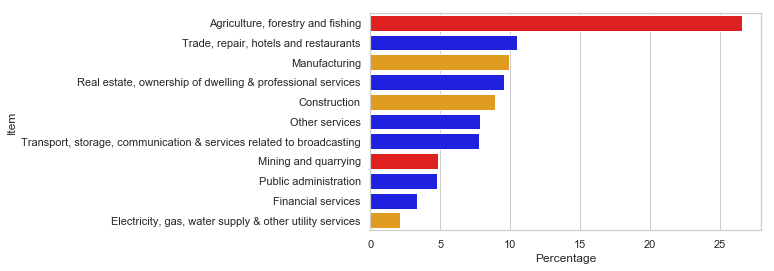

In [998]:
C3_states = (gdp_per_capita.loc[gdp_per_capita['Quantile'] == 'C3']).State
print("The states in the C3 quantile category are:")
print(C3_states)

C3 = gsva.loc[:,['S.No.', 'Item', 'Andhra Pradesh','Mizoram', 'Nagaland', 'Chattisgarh', 'Rajasthan', 'Tripura', 'Meghalaya']]
C3_subsectors = C3.iloc[[0,5,7,8,9,11,14,22,23,24,25,30],:]

C3_subsectors.reset_index(drop=True, inplace = True)
C3_subsectors = pd.concat([C3_subsectors, subsect], axis=1)
C3_total = C3_subsectors.iloc[11,2:-2].sum()

C3_percent = 100*((C3_subsectors.iloc[:,2:].sum(axis=1))/C3_total)
C3_percent.sort_values(ascending = False, inplace = True)

C3_graph = pd.concat([C3_subsectors, C3_percent], axis = 1)
C3_graph = C3_graph.rename(columns = {0:'Percentage'})
C3_graph = C3_graph.iloc[:-1,:]
C3_graph.sort_values('Percentage', ascending = False, inplace = True)

subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C3_graph['Sector']]

plt.figure(figsize=(7,4))
sns.barplot(y = 'Item', x = 'Percentage', data=C3_graph, palette=subsect_colors)
sns.set(style="whitegrid")
plt.show()

#### C4 Category (0th to 25th percentile)

The states in the C4 quantile category are:
18            Odisha
12    Madhya Pradesh
9          Jharkhand
2              Assam
14           Manipur
25     Uttar Pradesh
3              Bihar
Name: State, dtype: object


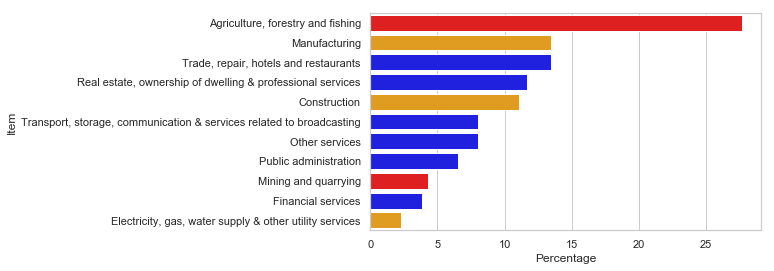

In [999]:
C4_states = (gdp_per_capita.loc[gdp_per_capita['Quantile'] == 'C4']).State
print("The states in the C4 quantile category are:")
print(C4_states)

C4 = gsva.loc[:,['S.No.', 'Item', 'Odisha', 'Madhya Pradesh','Jharkhand', 'Assam', 'Manipur', 'Uttar Pradesh', 'Bihar']]
C4_subsectors = C4.iloc[[0,5,7,8,9,11,14,22,23,24,25,30],:]

C4_subsectors.reset_index(drop=True, inplace = True)
C4_subsectors = pd.concat([C4_subsectors, subsect], axis=1)
C4_total = C4_subsectors.iloc[11,2:-2].sum()

C4_percent = 100*((C4_subsectors.iloc[:,2:].sum(axis=1))/C4_total)
C4_percent.sort_values(ascending = False, inplace = True)

C4_graph = pd.concat([C4_subsectors, C4_percent], axis = 1)
C4_graph = C4_graph.rename(columns = {0:'Percentage'})
C4_graph = C4_graph.iloc[:-1,:]
C4_graph.sort_values('Percentage', ascending = False, inplace = True)

subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C4_graph['Sector']]

plt.figure(figsize=(7,4))
sns.barplot(y = 'Item', x = 'Percentage', data=C4_graph, palette=subsect_colors)
sns.set(style="whitegrid")
plt.show()

### 3.6 - Insights and Recommendations for the quantile categories

Let's first compare the plots of each quantile category beside each other.

Text(0.0, 1.0, 'C4 Category')

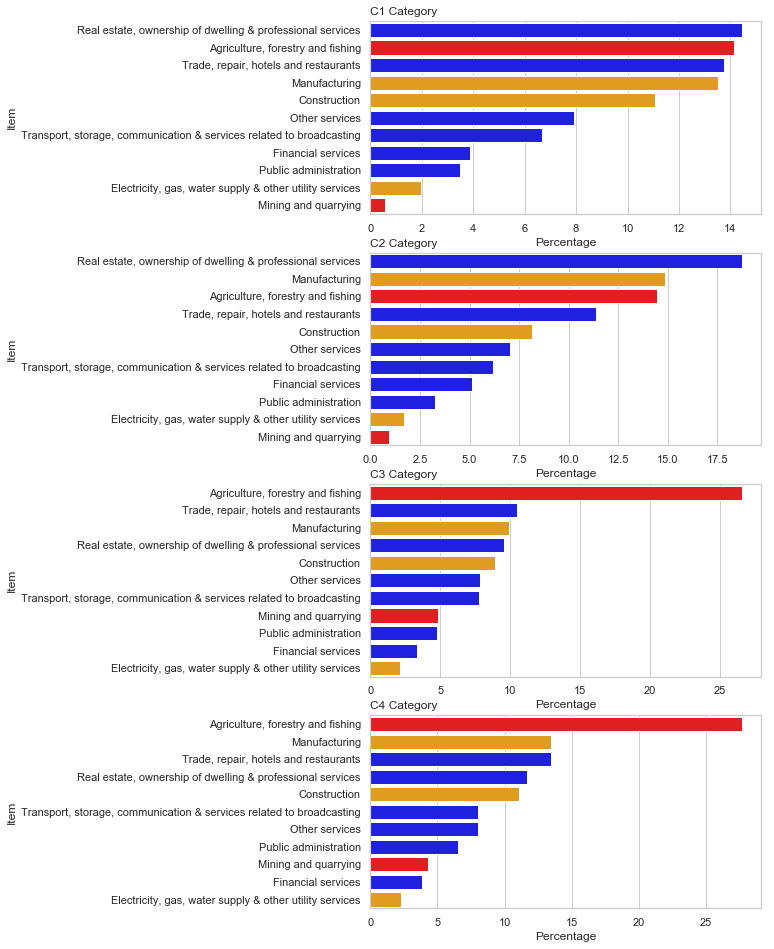

In [1000]:
plt.figure(figsize = (7,14))
plt.subplots_adjust(bottom = 0)

#subplot 1 for c1 plot
plt.subplot(4,1,1)
subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C1_graph['Sector']]
ax = sns.barplot(y = 'Item', x = 'Percentage', data=C1_graph, palette=subsect_colors)
plt.title('C1 Category', loc = 'left')

#subplot 1 for c2 plot
plt.subplot(4,1,2)
subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C2_graph['Sector']]
sns.barplot(y = 'Item', x = 'Percentage', data=C2_graph, palette=subsect_colors)
plt.title('C2 Category', loc = 'left')

#subplot 1 for c3 plot
plt.subplot(4,1,3)
subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C3_graph['Sector']]
sns.barplot(y = 'Item', x = 'Percentage', data=C3_graph, palette=subsect_colors)
plt.title('C3 Category', loc = 'left')

#subplot 1 for c4 plot
plt.subplot(4,1,4)
subsect_colors = ['red' if y == 'Primary' else 'orange' if y == 'Secondary' else 'blue' for y in C4_graph['Sector']]
sns.barplot(y = 'Item', x = 'Percentage', data=C4_graph, palette=subsect_colors)
plt.title('C4 Category', loc= 'left')

From the above juxtaposition of plots, we can observe the following insights:

-  <font color = darkorange> Manufacturing </font> subsector is among the **top 2** subsectors within every category and is the best performing subsector in top 2 categories.
-  There are no subsectors from <font color = blue> Tertiary  </font> sector at the top within any category.
-  <font color = darkorange> Construction </font> subsector is among the middle within every category which probably indicates that GDP per capita has very less influence on this subsector.
-  <font color = blue> Real estate & Professional services </font> subsector is the **2nd highest** performing subsector in **C1 and C2** categories.
-  <font color = red> Mining and quarrying </font> subsector is the worst performing subsector in **C1 and C2** categories.
-  <font color = red> Agriculture, forestry, and fishing </font> subsector is the **top** subsector in **C3 and C4** categories and is twice as big as the next best subsector in both these categories.
-  <font color = red> Agriculture, forestry, and fishing </font> subsector's percentage increases from **C1 to C4** suggesting an inverse relationship with GDP per capita.

From the above insights, we can make the following recommendations for states within these categories to increase their GDP per capita:

-  For states within the **C3 and C4** categories,  they need to reduce their focus on the <font color = red> primary </font> sector (primarily industries within agriculture, forestry, and fishing subsector) and focus more on industries based on <font color = darkorange> Manufacturing </font> and <font color = blue> Real estate & Professional services </font> subsectors.
-  For states within the **C2** category, they need to reduce focus on <font color = red> agriculture, forestry, and fishing </font> subsector and instead focus on subsectors in the <font color = blue> Tertiary </font> sector.
-  For states within the **C1** category, they need to increase their focus on subsectors in the <font color = blue> Tertiary </font> sector even more (currently <font color = darkorange> Manufacturing </font> sector is the best performing subsector) in order to increase their GDP per capita even further.

## 4. Part - 3

In Part - 2, we saw one way to increase GDP per Capita is to shift the distribution of GDP towards the **Secondary and Tertiary** sectors. However, both these sectors can only thrive on availability of educated and skilled labor.

So in this part, we will use the third dataset and the GDP per capita data to find and plot a **corelation** between GDP per Capita and Education.

This section consists of: <br>
4.1 - Data Cleaning <br>
4.2 - Corelation of GDP per capita vs. dropout rates in education <br>
4.3 - Insights and Recommendations <br>

In [1001]:
drop_rate.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


### 4.1 - Data Cleaning

-  As we analyzed the GDP per capita for states only for the `2014-15` year, unnecessary columns in the drop_rate dataframe will be dropped.
-  Null values for **Upper Primary, and Secondary** are directly replaced by the mean value of the respective column as missing data is less than **10%**.
-  Null values for **Primary, and Senior Secondary** cannot be directly replaced by the mean value of the column as both these columns contain more than **20%** of missing data. This can affect the variance heavily.
- Therefore, the null values in the **Primary, and Senior Secondary** columns will be first replaced by taking the mean of the drop out rates for the previous two years. Then, as the percentage of missing values falls under **10%**, the remaining null values are replaced by the mean of the respective column.

In [1002]:
#data cleaning
drop_rate.isnull().sum()
drop_rate.isnull().sum(axis=1)

# replacing null values for senior secondary education by finding the mean of the drop out rates for previous 2 years
PE_index = drop_rate.loc[np.isnan(drop_rate.loc[:,'Primary - 2014-2015.1']), 'Primary - 2014-2015.1'].index #finds index of null values
SSE_index = drop_rate.loc[np.isnan(drop_rate.loc[:,'Senior Secondary - 2014-2015']), 'Senior Secondary - 2014-2015'].index #finds index of null values

for x in PE_index: #loop to replace null values in primary education with the respective mean
    drop_rate.iloc[x,4:5] = drop_rate.iloc[:,2:4].mean(axis=1)[x]

for x in SSE_index: #loop to replace null values in senior secondary education with the respective mean
    drop_rate.iloc[x,13:] = drop_rate.iloc[:,11:13].mean(axis=1)[x]
    
# replacing null values for education by finding the mean of the respective column
drop_rate.loc[np.isnan(drop_rate.loc[:,'Primary - 2014-2015.1']), 'Primary - 2014-2015.1'] = drop_rate.loc[:,'Primary - 2014-2015.1'].mean()
drop_rate.loc[np.isnan(drop_rate.loc[:,'Upper Primary - 2014-2015']), 'Upper Primary - 2014-2015'] = drop_rate.loc[:,'Upper Primary - 2014-2015'].mean()
drop_rate.loc[np.isnan(drop_rate.loc[:,'Secondary - 2014-2015']), 'Secondary - 2014-2015'] = drop_rate.loc[:,'Secondary - 2014-2015'].mean()
drop_rate.loc[np.isnan(drop_rate.loc[:,'Senior Secondary - 2014-2015']), 'Senior Secondary - 2014-2015'] = drop_rate.loc[:,'Senior Secondary - 2014-2015'].mean()

# drop columns that aren't needed
drop_rate = drop_rate.iloc[:,[0,1,4,7,10,13]]

###  4.2 - Corelation of GDP per capita vs. dropout rates in education 

Let's see if there is a corelation between GDP per capita and Drop out rates in education in different stages (primary, secondary, senior secondary) for the year 2014-15.

In [1003]:
# creating a new dataframe containing the gdp per capita for the year 2014-15
gdp_scatter = gdp_per_capita.iloc[:,0:2]

# creating a new dataframe containing the drop out rates for the year 2014-15
droprate_scatter = drop_rate.iloc[:-1, 1:]
droprate_scatter = droprate_scatter.rename(columns = {'Level of Education - State':'State', 'Primary - 2014-2015.1':'Primary - 2014-2015'})

#merging the above 2 dataframes with an inner join
scatter_df = pd.merge(gdp_scatter, droprate_scatter, on = 'State', how = 'inner')

In [1004]:
scatter_df.head()

,GDP Per Capita,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,271793,Goa,0.730000,0.070000,11.15,13.91
1,240274,Sikkim,2.270000,1.570000,15.89,11.76
2,164077,Haryana,5.610000,5.810000,15.89,5.75
3,154778,Kerala,4.286471,3.992571,12.32,0.47
4,153076,Uttrakhand,4.040000,1.190000,10.40,3.01


Text(0, 0.5, 'Drop out percentage')

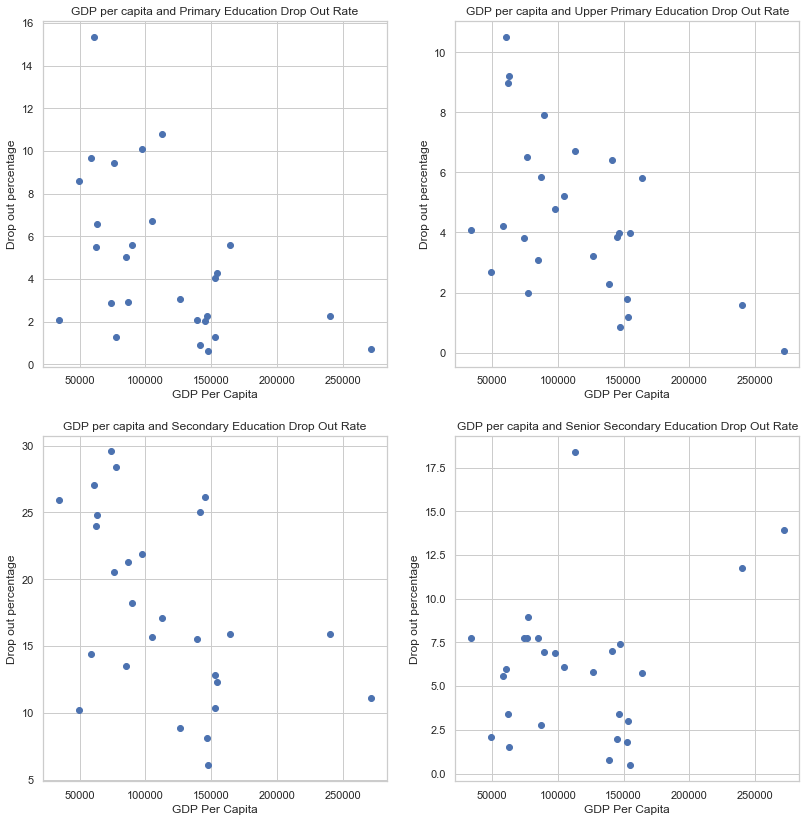

In [1005]:
# plotting the scatter plots
plt.figure(figsize = (12,12))
plt.subplots_adjust(bottom = 0, right = 1)

# scatter plot for primary
plt.subplot(2,2,1)
plt.scatter('GDP Per Capita', 'Primary - 2014-2015', data=scatter_df)
plt.title('GDP per capita and Primary Education Drop Out Rate')
plt.xlabel('GDP Per Capita')
plt.ylabel('Drop out percentage')

# scatter plot for upper primary
plt.subplot(2,2,2)
plt.scatter('GDP Per Capita', 'Upper Primary - 2014-2015', data=scatter_df)
plt.title('GDP per capita and Upper Primary Education Drop Out Rate')
plt.xlabel('GDP Per Capita')
plt.ylabel('Drop out percentage')

# scatter plot for secondary
plt.subplot(2,2,3)
plt.scatter('GDP Per Capita', 'Secondary - 2014-2015', data=scatter_df)
plt.title('GDP per capita and Secondary Education Drop Out Rate')
plt.xlabel('GDP Per Capita')
plt.ylabel('Drop out percentage')

# scatter plot for senior secondary
plt.subplot(2,2,4)
plt.scatter('GDP Per Capita', 'Senior Secondary - 2014-2015', data=scatter_df)
plt.title('GDP per capita and Senior Secondary Education Drop Out Rate')
plt.xlabel('GDP Per Capita')
plt.ylabel('Drop out percentage')

### 4.3 - Insights and Recommendations

From the 4 scatter plots above, we observe the following insights:

-  For **Primary, Upper Primary, and Secondary** Education, GDP per capita seems to have an inverse relationship with the drop out rates associated with those educational levels.
-  For **Senior Secondary** Education, GDP per capita seems to not have any relationship with the drop out rate. 
-  We know, Senior Secondary education comes after primary, upper primary, and secondary education. We also know children in this educational level are usually 16-17 years of age. Therefore, the reasons of dropping out could be different than those in the first 3 educational levels.

From the insights obtained, few **recommendations** can be made:

-  From the first 3 scatter plots, GDP per capita has an **inverse relationship** upto secondary education. Focusing on educating kids through these levels without dropping out due to reasons such as low finance, and unavailability of good schools will help these states improve their GDP per capita.
-  We cannot make recommendations on Senior Secondary education based on the dataset we have. For the dataset we have, we cannot say there's a relationship between GDP per capita and Senior Secondary education. It would make common sense that, drop out rates in this level do matter, as this is the educational level before college level education which produces highly educated and skilled labor.